In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [2]:
df = pd.read_csv("n90pol.csv")


In [3]:
df.head()

,amygdala,acc,orientation
0,0.0051,-0.0286,2
1,-0.0674,0.0007,3
2,-0.0257,-0.0110,3
3,0.0504,-0.0167,2
4,0.0125,-0.0005,5


In [4]:
df.describe()

,amygdala,acc,orientation
count,90.000000,90.000000,90.000000
mean,0.000001,-0.000006,3.577778
std,0.032605,0.020435,0.899160
min,-0.067600,-0.037700,2.000000
25%,-0.020150,-0.012200,3.000000
50%,-0.000700,-0.003950,4.000000
75%,0.024775,0.011650,4.000000
max,0.081200,0.055900,5.000000


In [5]:
scaler_amyg = MinMaxScaler()
x = scaler_amyg.fit_transform(df["amygdala"].values.reshape(90,1))

scaler_acc = MinMaxScaler()
y = scaler_amyg.fit_transform(df["acc"].values.reshape(90,1))

target = df['orientation'].values.reshape(90,1)

In [6]:
x = df["amygdala"].values
y = df["acc"].values
z = df['orientation'].values

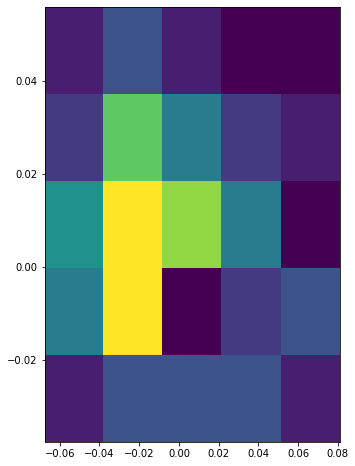

In [7]:
H, xedges, yedges = np.histogram2d(x.reshape(90), y.reshape(90), bins=5)
X, Y = np.meshgrid(xedges, yedges)
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(131)
ax.pcolormesh(X, Y, H)

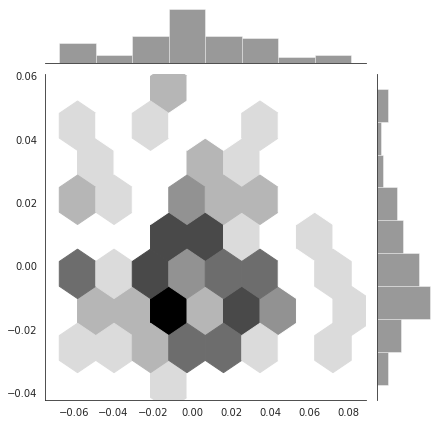

In [8]:
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

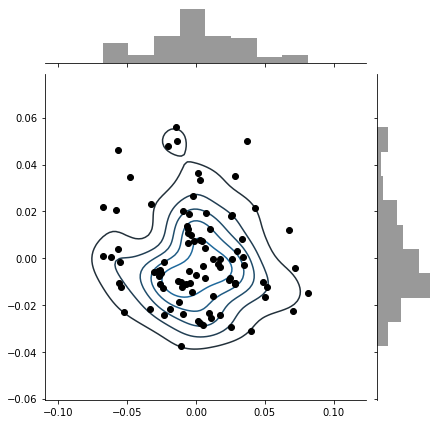

In [9]:
g = (sns.jointplot(x,y,
                   color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=5))


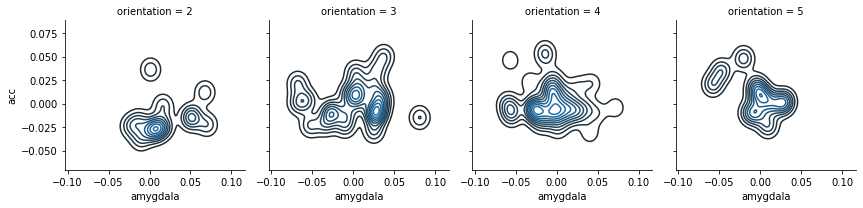

In [10]:
g = sns.FacetGrid(df, col="orientation")
g.map(sns.kdeplot, "amygdala", "acc", bw=.0085);

In [120]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
x_prob = gnb.fit(x.reshape(90,1), target.reshape(90,1)).predict_proba(x.reshape(90,1))

y_prob = gnb.fit(y.reshape(90,1), target.reshape(90,1)).predict_proba(y.reshape(90,1))

/home/jfftilton/anaconda3/envs/cv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/jfftilton/anaconda3/envs/cv/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [121]:
orientation = ['O_2','O_3','O_4','O_5']
x_prob_df = pd.DataFrame(x_prob, columns=orientation)
x_prob_df['amygdala'] = x

In [122]:
x_prob_df_long = pd.melt(x_prob_df, col_level=0, id_vars=['amygdala'], value_vars=orientation)
x_prob_df_long['orientation'] = x_prob_df_long['variable']
x_prob_df_long['pdf'] = x_prob_df_long['value']
x_prob_df_long.head()

,amygdala,variable,value,orientation,pdf
0,0.0051,O_2,0.141214,O_2,0.141214
1,-0.0674,O_2,0.021527,O_2,0.021527
2,-0.0257,O_2,0.068488,O_2,0.068488
3,0.0504,O_2,0.311608,O_2,0.311608
4,0.0125,O_2,0.165537,O_2,0.165537


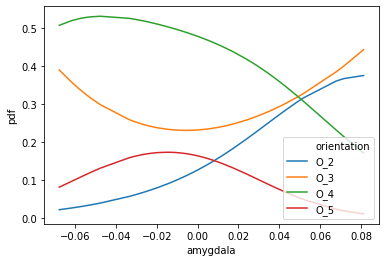

In [123]:
 ax = sns.lineplot(x="amygdala", y="pdf", hue="orientation",data=x_prob_df_long)

In [125]:
y_prob_df = pd.DataFrame(y_prob, columns=orientation)
y_prob_df['acc'] = y

y_prob_df_long = pd.melt(y_prob_df, col_level=0, id_vars=['acc'], value_vars=orientation)
y_prob_df_long['orientation'] = y_prob_df_long['variable']
y_prob_df_long['pdf'] = y_prob_df_long['value']
y_prob_df_long.head()

,acc,variable,value,orientation,pdf
0,-0.0286,O_2,0.322129,O_2,0.322129
1,0.0007,O_2,0.110509,O_2,0.110509
2,-0.0110,O_2,0.176393,O_2,0.176393
3,-0.0167,O_2,0.217564,O_2,0.217564
4,-0.0005,O_2,0.116176,O_2,0.116176


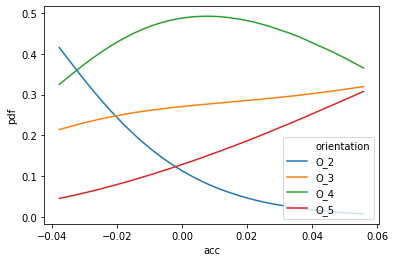

In [126]:
 ax = sns.lineplot(x="acc", y="pdf", hue="orientation",data=y_prob_df_long)

In [129]:
import statsmodels.api as sm
dens_c = sm.nonparametric.KDEMultivariateConditional(endog=x,exog=z, dep_type='c', indep_type='c', bw='normal_reference')

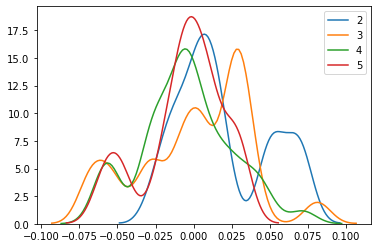

In [154]:
grpd = df.groupby('orientation')

for g,v in grpd:
    x = pd.DataFrame(v['amygdala'].values, columns=[g])[g]
    sns.kdeplot(x, bw=.0085)


13
24
41
12


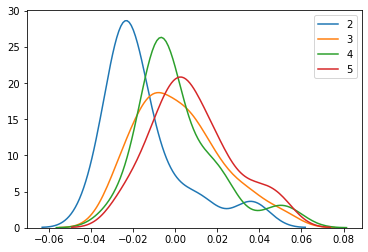

In [153]:
for g,v in grpd:
    x = pd.DataFrame(v['acc'].values, columns=[g])[g]
    print(len(x))
    sns.kdeplot(x, bw=.0085)
